In [1]:
##============================================================================
## Name        : Riris A Silalahi
## Description : Regression to Predict House Prices
##=============================================================================

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

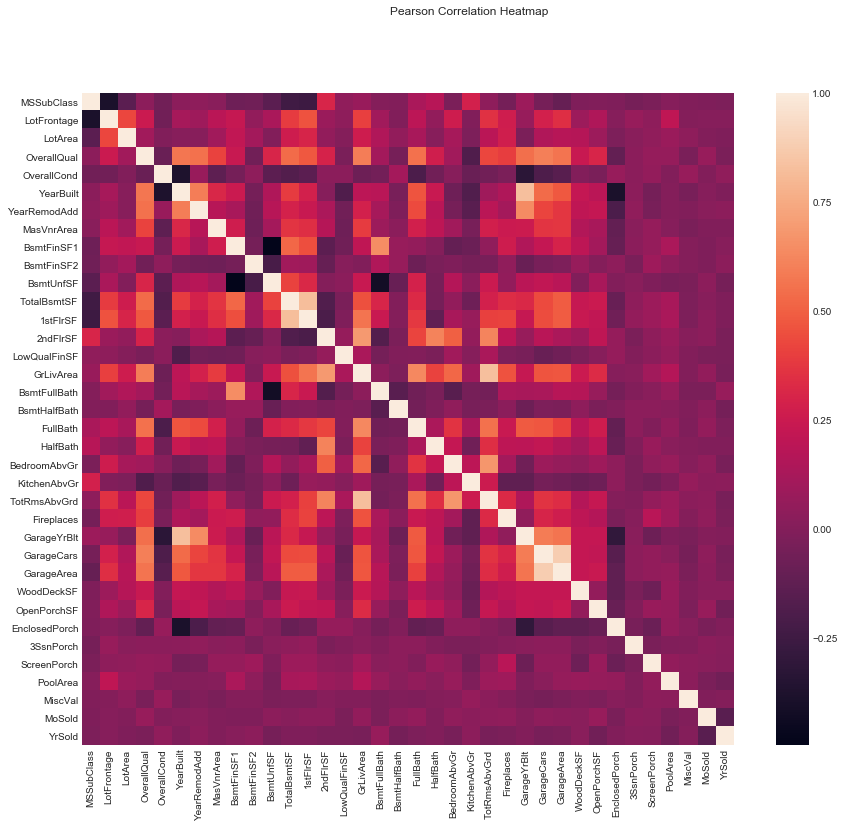

In [8]:
pd.set_option('precision',2)
plt.figure(figsize=(15,12))
sns.heatmap(df_train.drop(["SalePrice","Id"],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


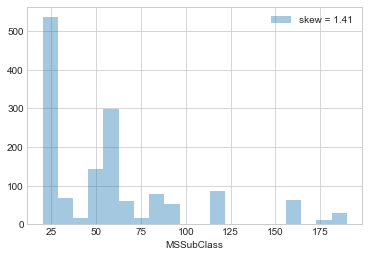

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


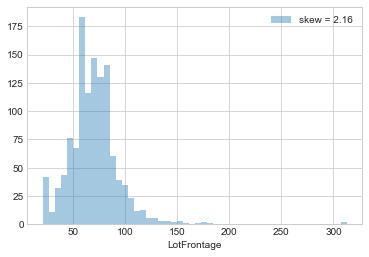

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


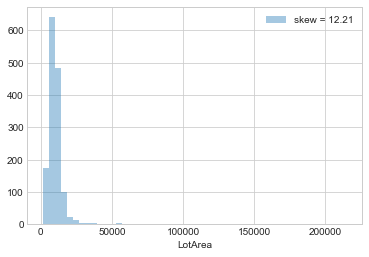

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


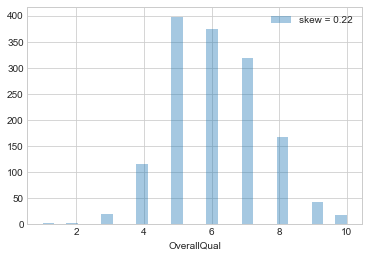

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


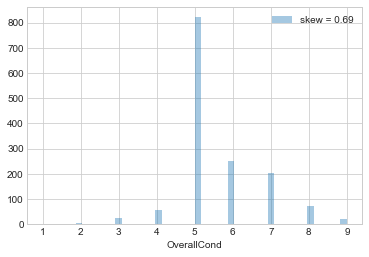

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


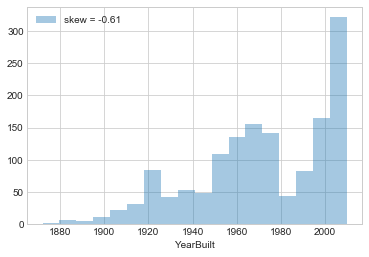

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


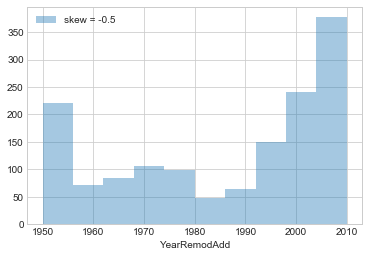

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


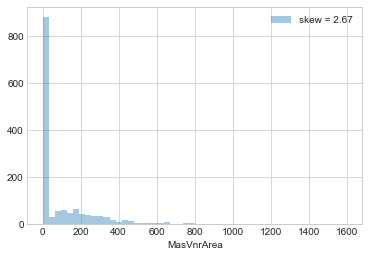

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


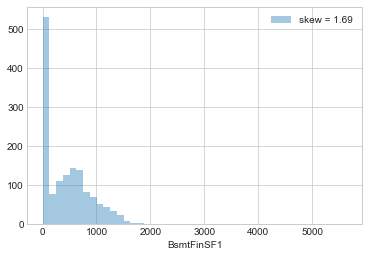

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


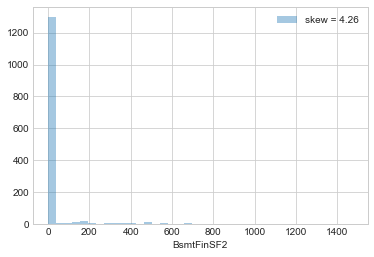

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


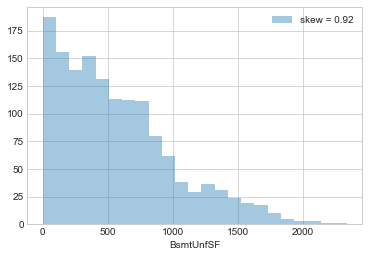

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


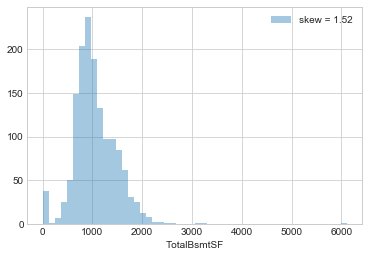

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


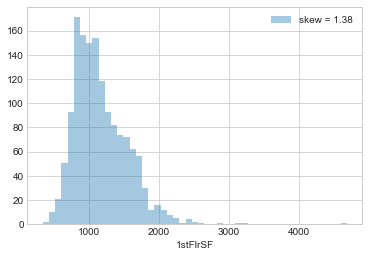

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


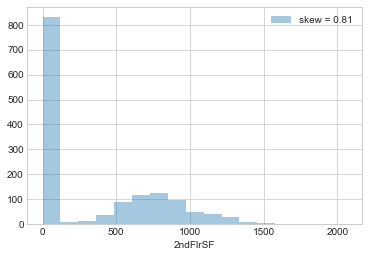

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


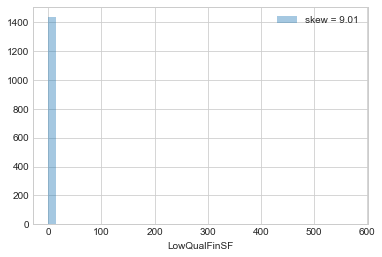

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


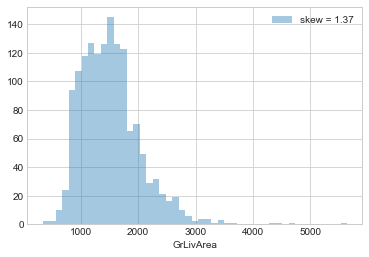

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


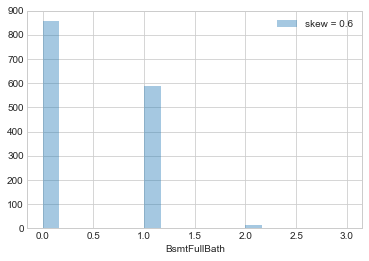

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


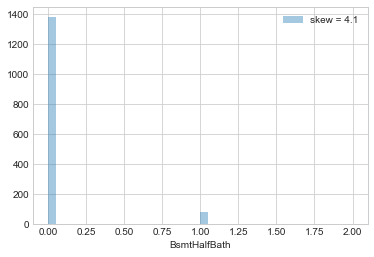

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


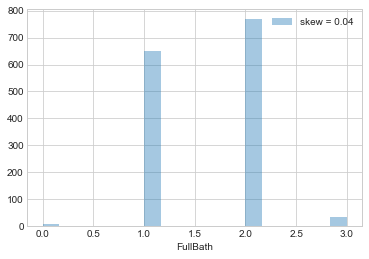

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


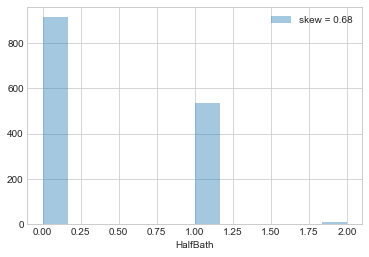

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


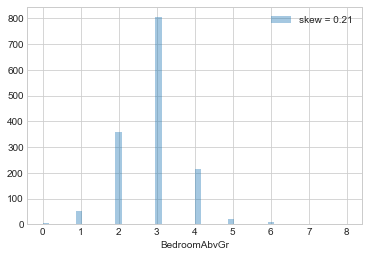

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


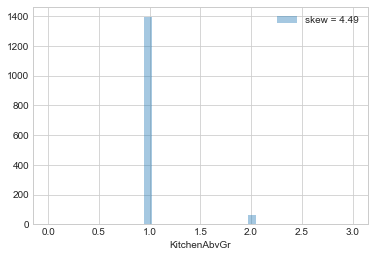

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


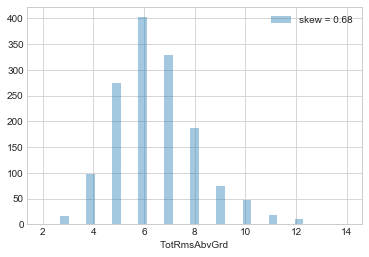

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


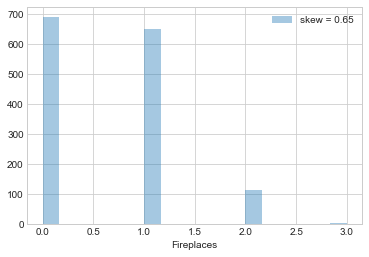

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


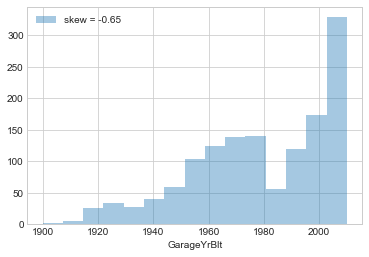

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


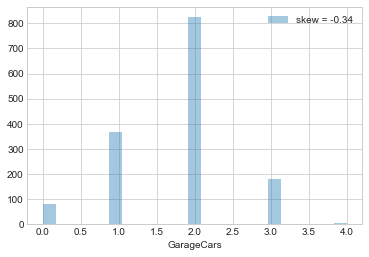

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


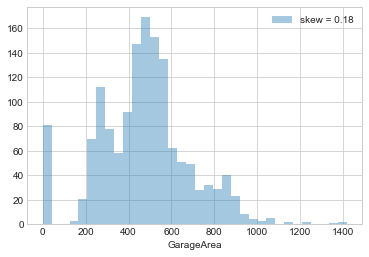

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


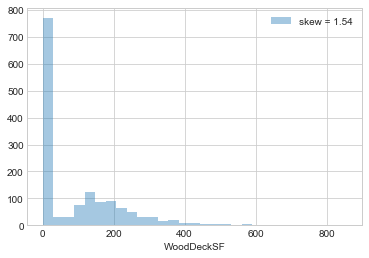

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


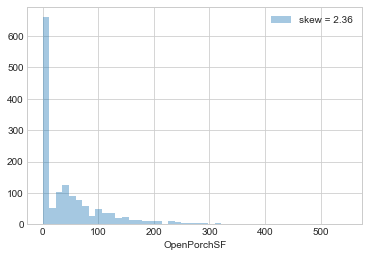

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


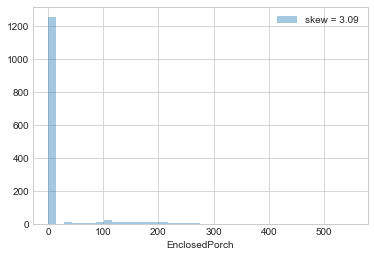

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


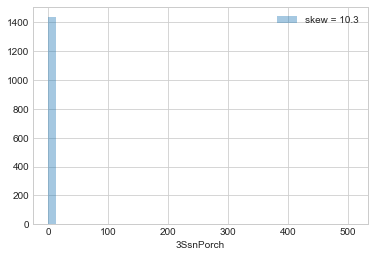

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


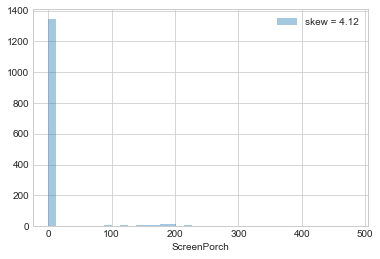

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


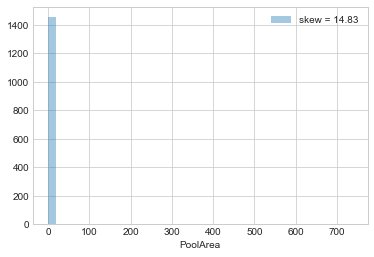

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


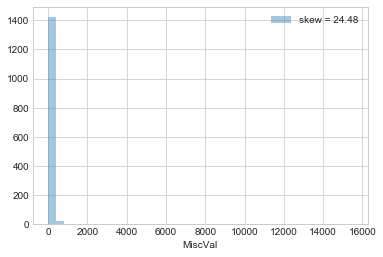

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


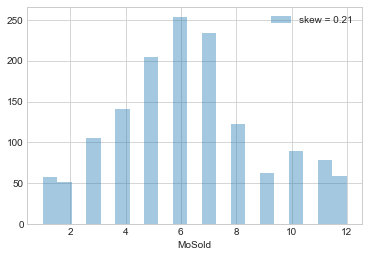

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


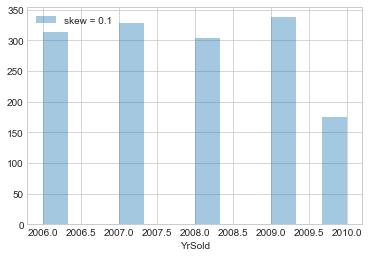

In [9]:
skews = df_train.skew()
for col in df_train.drop(["Id","SalePrice"], axis=1).columns.tolist():
    if (df_train[col].dtype == 'float64') or (df_train[col].dtype == 'int64') :
        sns.distplot(df_train[col].dropna(), kde=False, label="skew = " + str(round(skews[col],2)) )
        plt.legend()
        plt.show()
        
del skews        

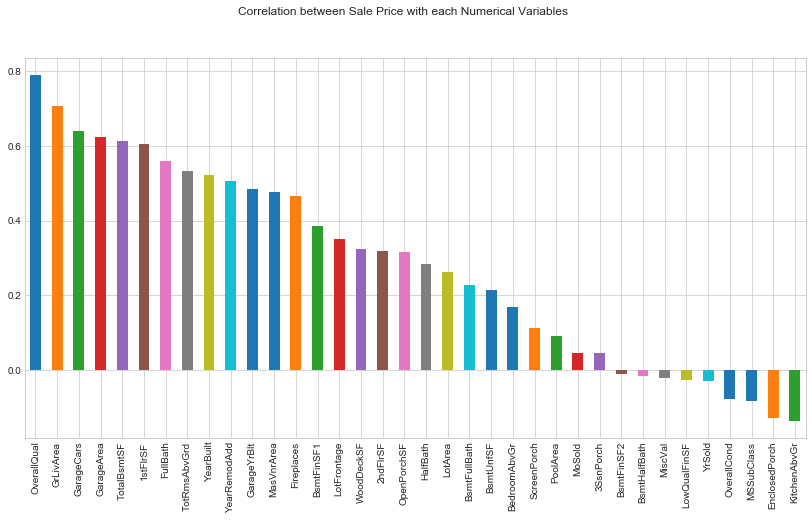

In [10]:
corr_with_SalePrice = df_train.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.suptitle("Correlation between Sale Price with each Numerical Variables")
plt.show()

del corr_with_SalePrice

<Figure size 864x720 with 0 Axes>

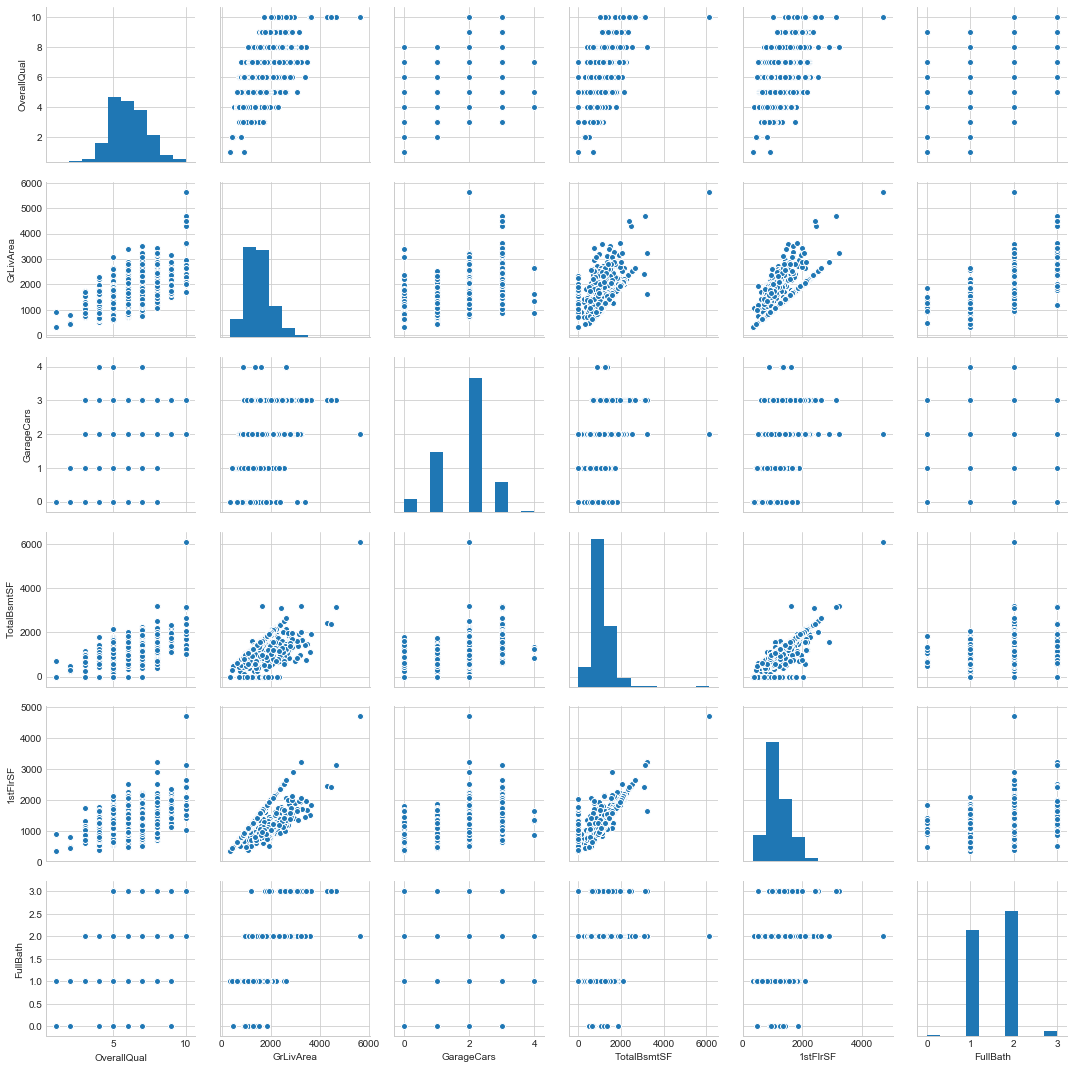

In [11]:
plt.figure(figsize=(12,10))
interesting_cols = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF" ,"1stFlrSF", "FullBath"]
sns.pairplot(df_train[interesting_cols], dropna=True)
plt.show()

del interesting_cols

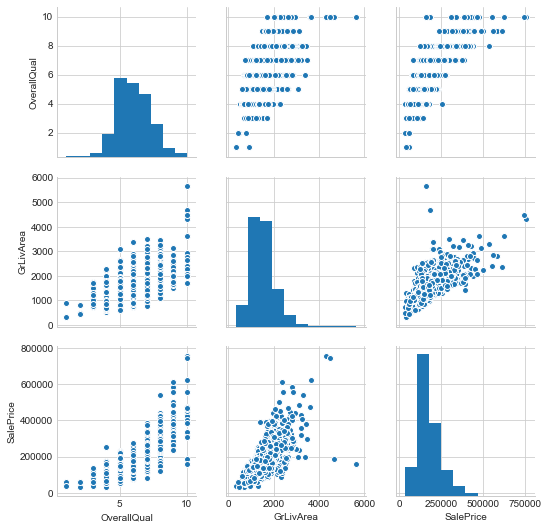

In [12]:
sns.pairplot(df_train[["OverallQual", "GrLivArea","SalePrice"]])
plt.show()

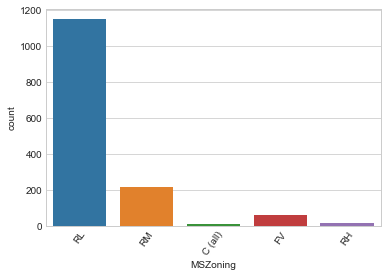

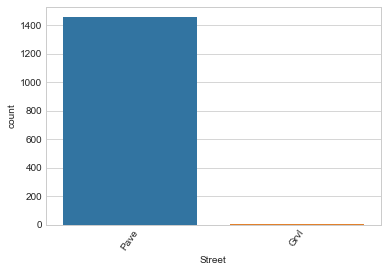

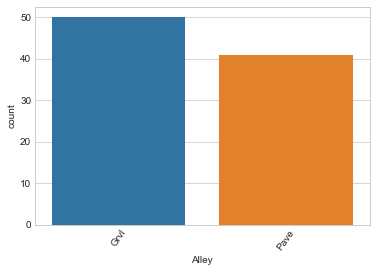

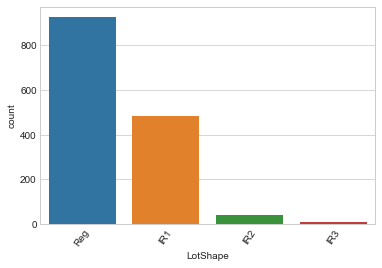

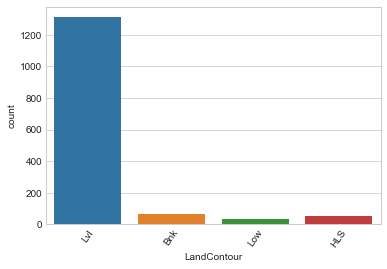

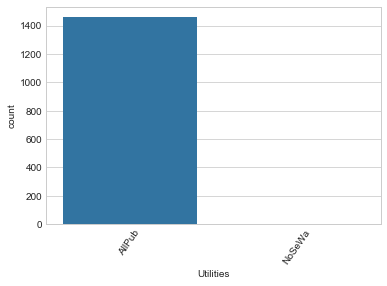

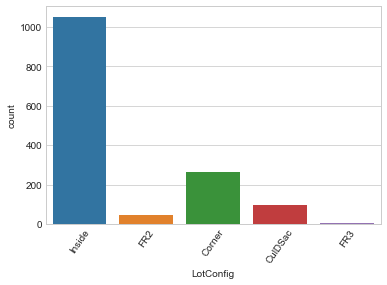

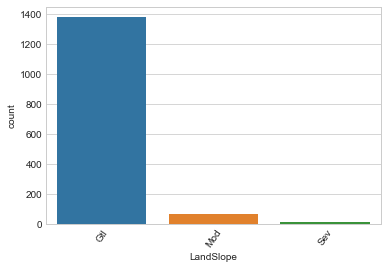

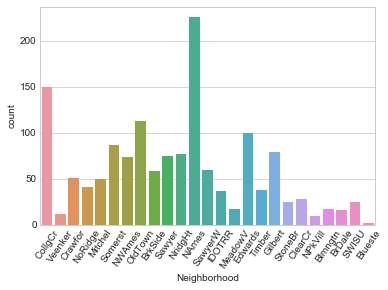

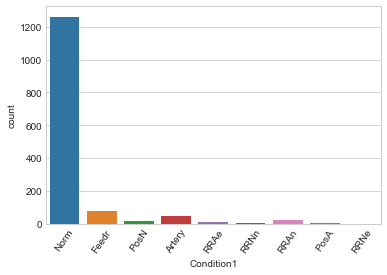

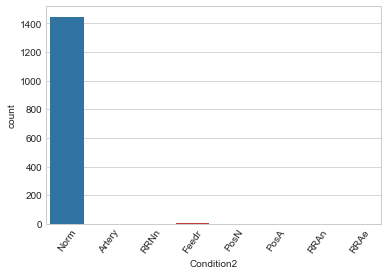

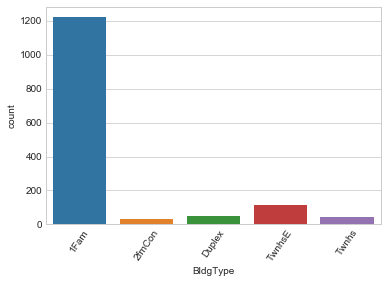

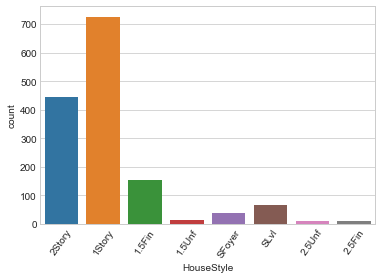

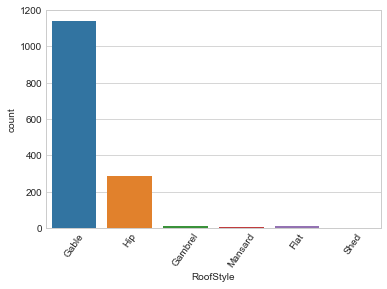

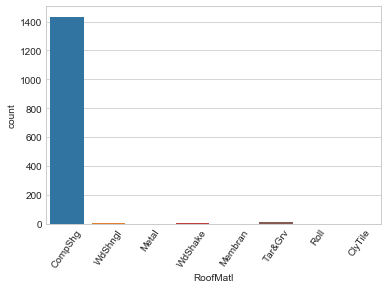

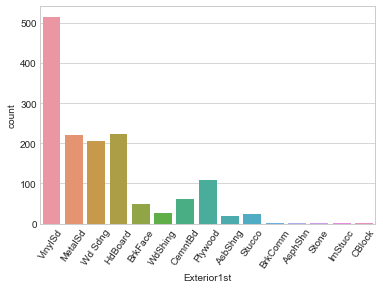

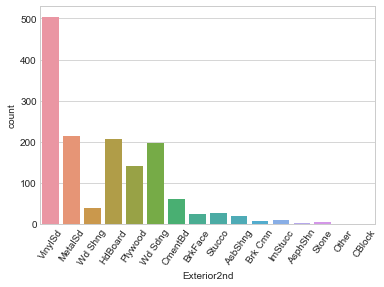

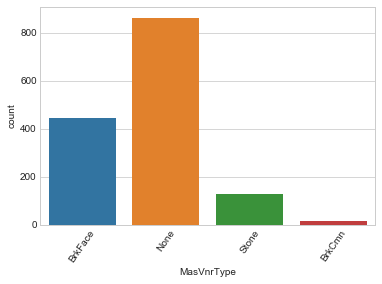

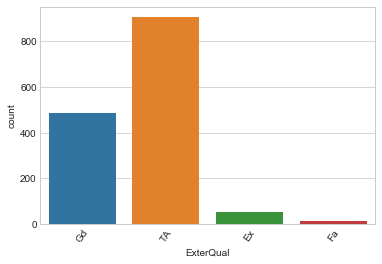

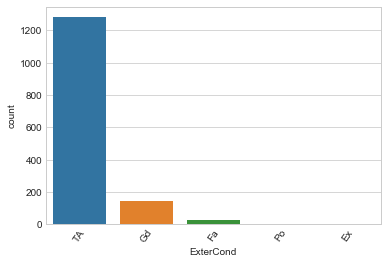

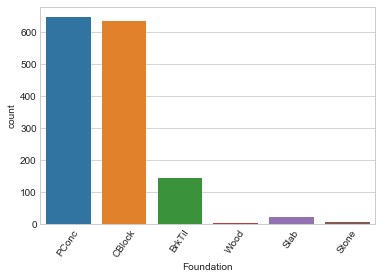

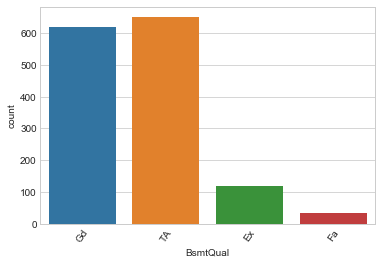

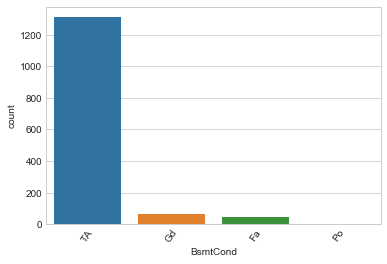

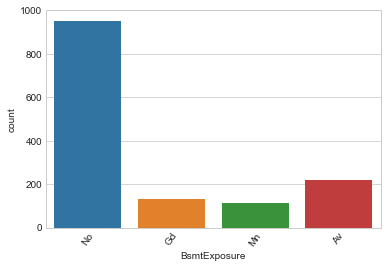

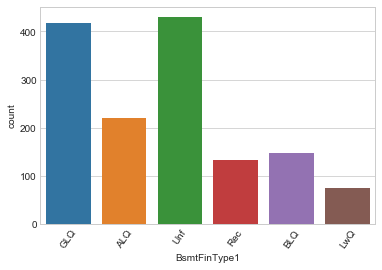

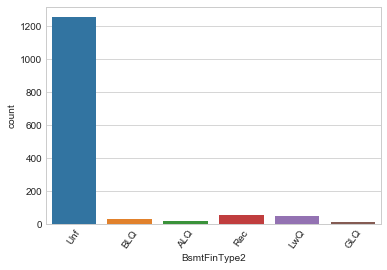

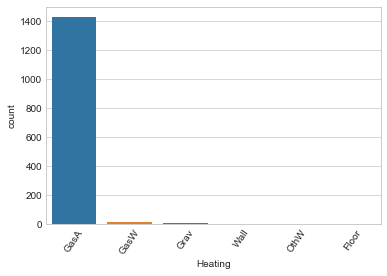

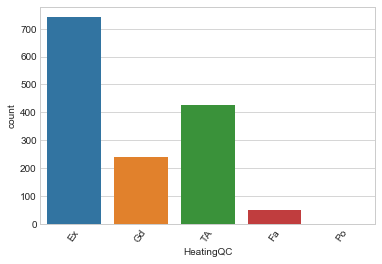

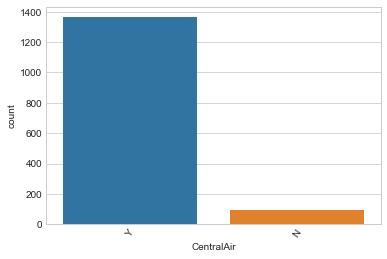

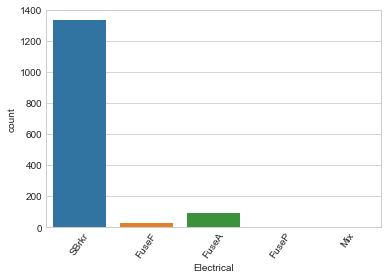

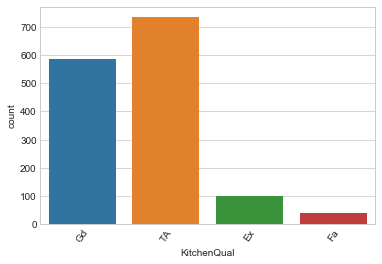

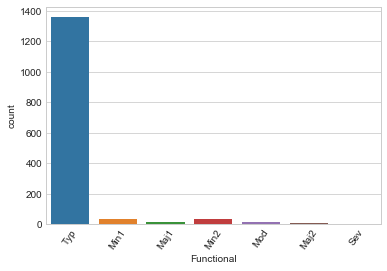

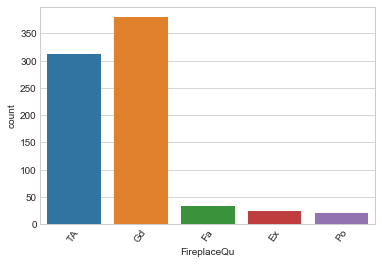

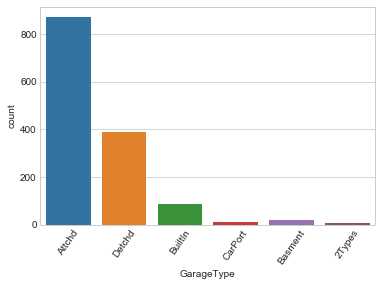

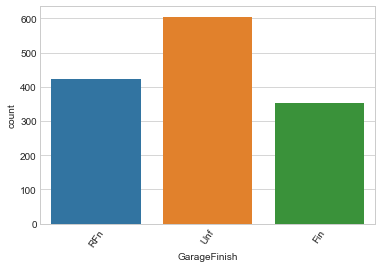

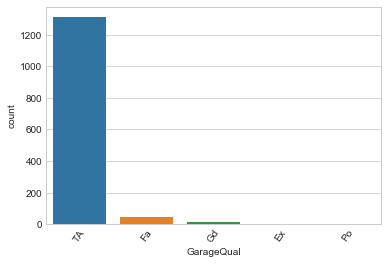

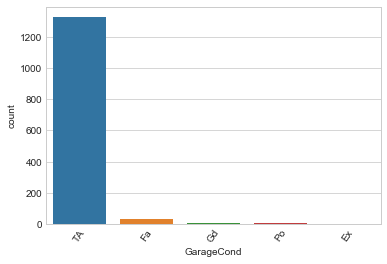

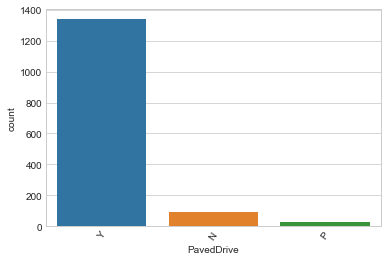

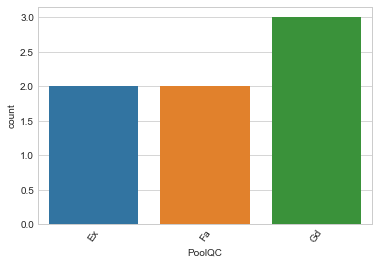

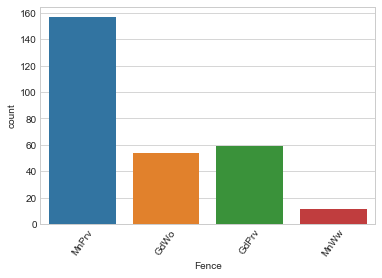

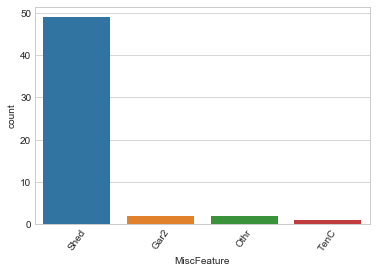

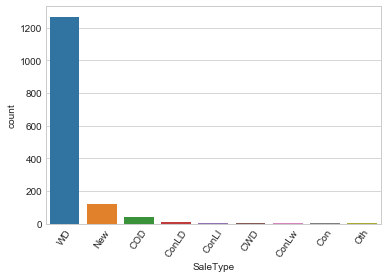

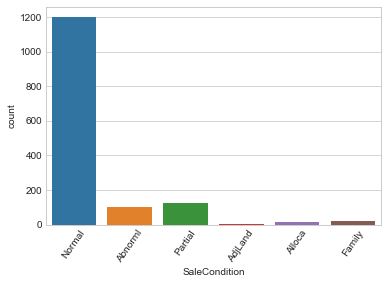

In [13]:
for col in df_train.columns.tolist():
    if df_train[col].dtype == 'object':
        sns.countplot(col, data=df_train)
        plt.xticks(rotation=55)
        plt.show()

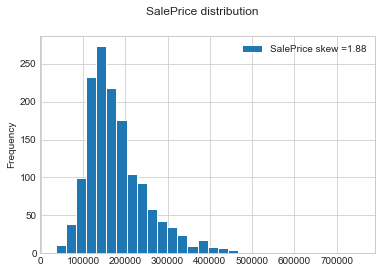

In [14]:
skewness = df_train['SalePrice'].skew()
df_train['SalePrice'].plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)))
plt.suptitle("SalePrice distribution")
plt.legend()
plt.show()

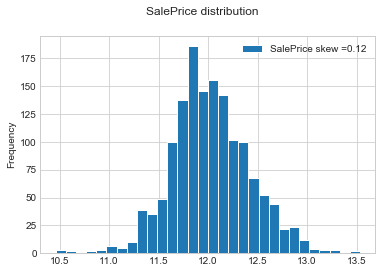

In [15]:
skewness = np.log( df_train['SalePrice']).skew()
np.log( df_train['SalePrice']).plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)))
plt.suptitle("SalePrice distribution")
plt.legend()
plt.show()

del skewness

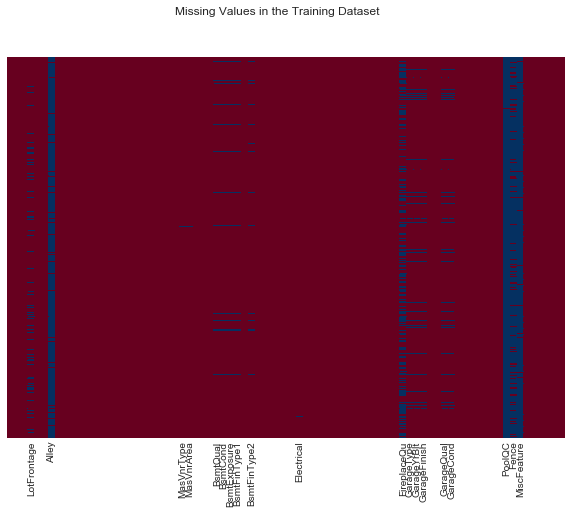

In [16]:
label_nas = []
for col in df_train.columns.tolist():
    if np.sum(df_train[col].isnull() ) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")

plt.figure(figsize=(10,7))
plt.suptitle('Missing Values in the Training Dataset')
sns.heatmap(df_train.isnull(),yticklabels=False, xticklabels=label_nas ,cbar = False, cmap='RdBu')
plt.show()

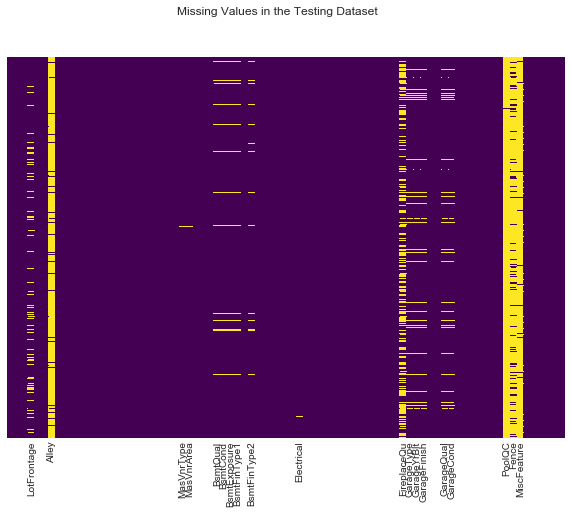

In [17]:
label_nas = []
for col in df_test.columns.tolist():
    if np.sum(df_train[col].isnull() ) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")

plt.figure(figsize=(10,7))
plt.suptitle('Missing Values in the Testing Dataset')
sns.heatmap(df_train.isnull(), yticklabels=False, xticklabels=label_nas ,cbar = False, cmap='viridis')
plt.show()

In [18]:
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print("Null values per columns")
print(null_values_per_col)
df_train.drop(['Alley','PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)
df_test.drop(['Alley','PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)
df_train.shape
df_test.shape

Null values per columns
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQu

(1459, 76)

In [19]:
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print(r"There are %d"  %np.sum(null_values_per_col != 0)  + " columns to impute.\n")

cols_to_impute = []
for col_index, val in null_values_per_col.items():
    if val != 0: cols_to_impute.append(col_index)

print(r"The columns to impute are:")        
for column in cols_to_impute:
    print(column)                 

There are 15 columns to impute.

The columns to impute are:
LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [20]:
imputation_val_for_na_cols = dict()
for col in cols_to_impute:
    if (df_train[col].dtype == 'float64' ) or  (df_train[col].dtype == 'int64'):
        imputation_val_for_na_cols[col] = np.nanmedian(df_train[col])
    else:
        imputation_val_for_na_cols[col] = df_train[col].value_counts().argmax()

for key, val in imputation_val_for_na_cols.items():
    df_train[key].fillna(value= val, inplace = True)
    df_test[key].fillna(value = val, inplace = True)

print("Checking if everything went well ...")    
print("Number of missing values in training set after imputation and cleaning ",
          np.sum(np.sum(df_train.isnull())))    
print("Number of missing values in test set after imputation and cleaning " ,
      np.sum( np.sum(df_test.isnull())) )

del imputation_val_for_na_cols, cols_to_impute

Checking if everything went well ...
Number of missing values in training set after imputation and cleaning  0
Number of missing values in test set after imputation and cleaning  22


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


In [21]:
null_test = np.sum(df_test.isnull(), axis=0) 
for col, null_vals in null_test.iteritems():
    if null_vals != 0:        
        if (df_test[col].dtype == 'float64' ) or  (df_test[col].dtype == 'int64'):
            df_test[col].fillna(value = np.nanmedian(df_test[col]), inplace = True)
        else:
            df_test[col].fillna(value = df_test[col].value_counts().argmax(), inplace = True)
        
print("Number of missing values in test set after second round of imputation " ,
      np.sum( np.sum(df_test.isnull(), axis= 0)) )   

del null_test

Number of missing values in test set after second round of imputation  0


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  import sys


In [22]:
X, y = df_train.drop(["Id","SalePrice"], axis = 1), df_train["SalePrice"]
X_test = df_test.drop("Id", axis = 1)

In [23]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(1460, 75)
(1460,)
(1459, 75)


In [24]:
y_log = np.log(df_train["SalePrice"])

In [25]:
print("Training set shape (%d,%d)" %X.shape)
print("Test set shape (%d,%d)" %X_test.shape)

# Determine categorical features
categorical_features = []
is_categorical = X.dtypes == 'object'
for col in X.columns.tolist():
    if is_categorical[col]: categorical_features.append(col)

for feature in categorical_features:    
    #Label categorical values
    le = LabelEncoder()
    X[feature]  = le.fit_transform(X[feature])
    X_test[feature] = le.transform(X_test[feature] )    
    # Perform one hot encoding
    ohe = OneHotEncoder(sparse = False)
    # Name columns
    columns = [feature + '_' + str(class_) for class_ in le.classes_]
    #Drop first column to avoid dummy variable trap
    X_dummies = pd.DataFrame( ohe.fit_transform(X[feature].values.reshape(-1,1))[:, 1:] ,
                            columns = columns[1:])
    X_test_dummies = pd.DataFrame( ohe.transform(X_test[feature].values.reshape(-1,1))[:,1:],
                                 columns = columns[1:])
    # Drop original feature
    X.drop(feature, axis=1)
    X_test.drop(feature, axis=1)
    X = pd.concat([X, X_dummies], axis=1)    
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
print("\n After One Hot Encoding\n")
print("Training set shape (%d,%d)" %X.shape)
print("Test set shape (%d,%d) \n" %X_test.shape)

print("A peek:\n")
X.head()

Training set shape (1460,75)
Test set shape (1459,75)

 After One Hot Encoding

Training set shape (1460,275)
Test set shape (1459,275) 

A peek:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,3,80.0,9600,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,3,68.0,11250,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,3,60.0,9550,1,0,3,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
threshold = int(.7 * len(X))                                     
X_train = X[:threshold]                             
X_val = X[threshold:]  

In [66]:
threshold = int(.7 * len(y))                                     
y_train = y[:threshold]                             
y_val = y[threshold:]  

In [80]:
##DECISSION TREE

from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X_train.astype(int), y_train.astype(int))
y_pred= reg.predict(X_val)


In [84]:
# Calculate the absolute errors
errors = abs(y_pred - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 25437.63 degrees.
Accuracy: 85.29 %.


In [82]:
df=pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})  
df  

,Actual,Predicted
1021,194000,184900.0
1022,87000,110000.0
1023,191000,188500.0
1024,287000,430000.0
1025,112500,118000.0
1026,167500,164900.0
1027,293077,307000.0
1028,105000,123000.0
1029,118000,113000.0
1030,160000,130000.0


In [76]:
#LInear Regression without Normalising

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_val)

print(r2_score(y_val, y_predictions))


0.8114461256305834


In [71]:
#Normalising

from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
threshold_x = int(.7 * len(X))                                     
X_train_normalized = normalized_X[:threshold_x]                             
X_val_normalized = normalized_X[threshold_x:] 
threshold_y = int(.7 * len(y))                                     
y_train_normalized = y_log[:threshold_y]                             
y_val_normalized = y_log[threshold_y:]  

In [72]:
#LInear Regression with Normalising

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train_normalized)
y_predictNormalised =np.exp(reg.predict(X_val))

In [74]:
# Calculate the absolute errors
errors = abs(y_predictNormalised - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 19671.43 degrees.
Accuracy: 88.39 %.


In [57]:
X_test_dummies.shape

(1459, 5)

In [58]:
y.shape

(1460,)

In [79]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_predictions = rf.predict(X_val)

from sklearn.metrics import r2_score


In [78]:
# Calculate the absolute errors
errors = abs(y_predictions - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_val)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 19884.92 degrees.
Accuracy: 88.5 %.


In [42]:
## for kaggle submission
from sklearn import preprocessing
norm_X = preprocessing.normalize(X)
norm_X_test = preprocessing.normalize(X_test)

In [43]:
#LInear Regression with Normalising

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X , y_log)
y_predictNormalised =np.exp(reg.predict(X_test))

In [44]:
df_submission = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_predictNormalised })

df_submission.to_csv("submission_1_16_Aug_18.csv", index= False)


In [45]:
#LInear Regression without Normalising

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
y_prediction = reg.predict(X_test)

In [46]:
df_submission = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_prediction  })

df_submission.to_csv("submission_2_16_Aug_18.csv", index= False)

In [47]:
##DECISSION TREE

from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(X.astype(int), y.astype(int))
y_pred= reg.predict(X_test)

In [48]:
df_submission = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_pred })

df_submission.to_csv("submission_3_16_Aug_18.csv", index= False)

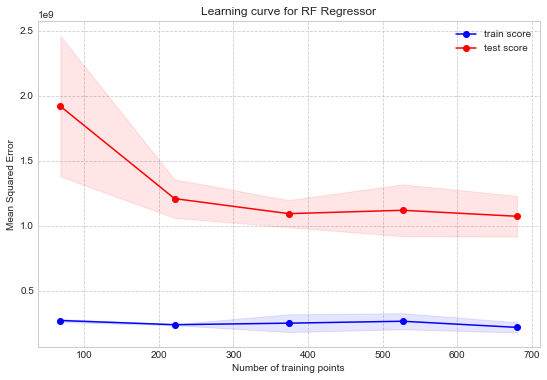

In [50]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel(r'Mean Squared Error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show() 
    
# Plot the learning curve
rf = RandomForestRegressor()
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(
                                            rf, X = X_train, y = y_train, 
                                            cv= 3,  scoring='neg_mean_squared_error')

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RF Regressor')    